## Task 2: Decision and Workflow of Model

In [1]:
%matplotlib inline

In [2]:
import sys

# add the path to the storm_predict module so it's always found
sys.path.append('..')

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import transforms
from storm_predict.loader.speed_loader import StormDataset, get_train_val_loader
from storm_predict.models.wind_speed_model import ConvNet, train_model, show_difference, predict_unknown

In [3]:
device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")
print(f'Using device: {device}')

Using device: mps


In [4]:
data_path = '/Users/zz2123/Documents/Selected_Storms_curated/tst/'

transformer = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])
])

dataset = StormDataset(root_dir=data_path, start_idx=0, end_idx=-20, transform=transformer)
train_loader, val_loader = get_train_val_loader(dataset, train_size=0.8)

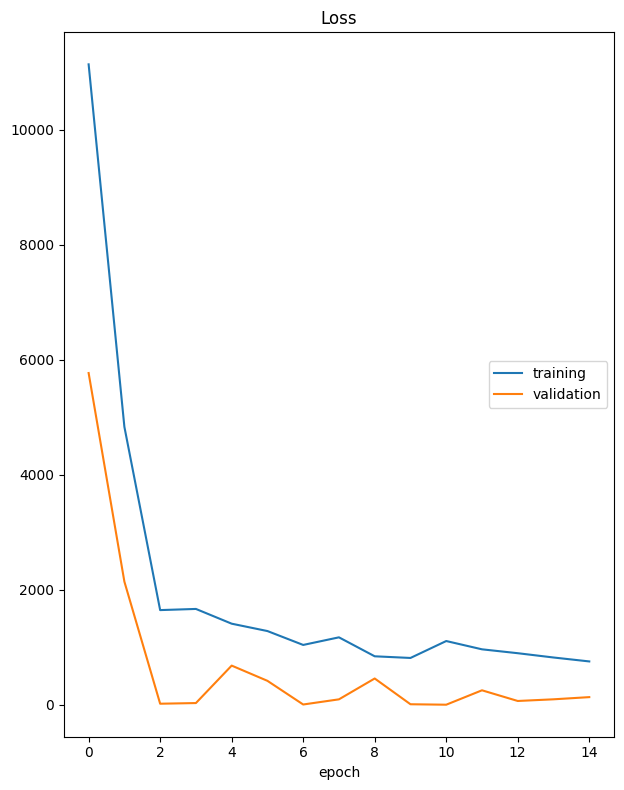

Loss
	training         	 (min:  753.797, max: 11137.424, cur:  753.797)
	validation       	 (min:    1.257, max: 5769.217, cur:  133.045)
Validation Loss: 133.04522323608398


In [5]:
# Instantiate the model
model = ConvNet().to(device)

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# train
model = train_model(model, device, train_loader, val_loader, criterion, optimizer, num_epochs=15, save_path='best_model.pth')

rmse: 0.6859115176811763


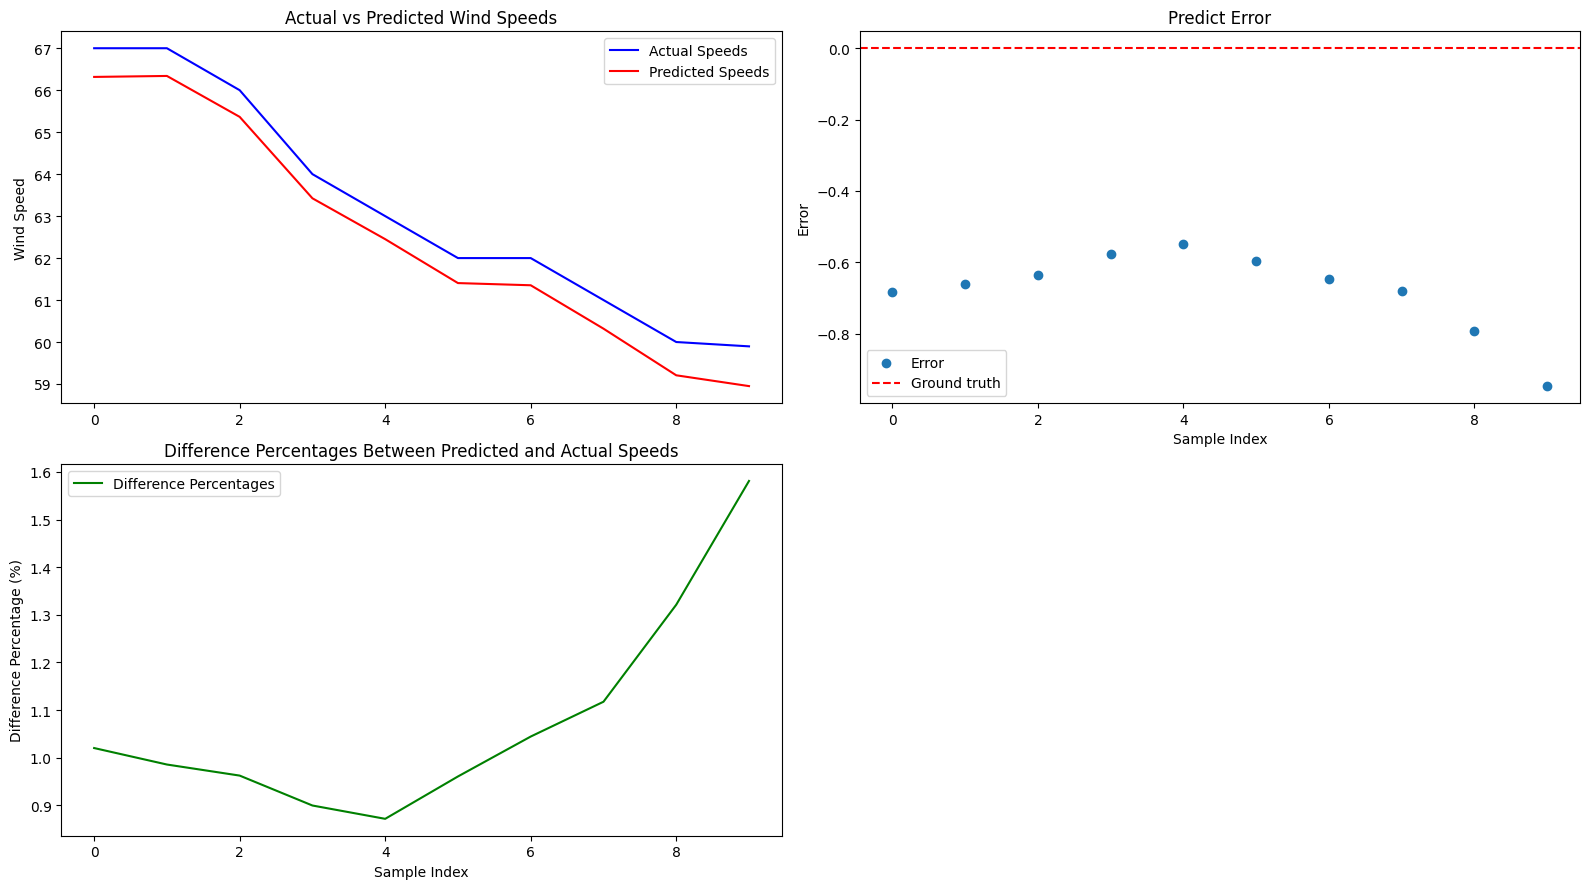

In [8]:
# pretrained_model = ConvNet().to(device)
# pretrained_model.load_state_dict(torch.load('best_model_tst_v5.0.pth'))
unseen_path = '/Users/zz2123/Documents/Selected_Storms_curated/tst/'
predict_loader = DataLoader(StormDataset(root_dir=unseen_path, start_idx=-25, end_idx=-13, transform=transformer), batch_size=32, shuffle=False)
show_difference(unseen_path, model, predict_loader, device, start=-10)

In [10]:
result = predict_unknown(unseen_path, model, device, predict_num=13, transformer=transformer)
print(result)

[58.829345703125, 58.60569763183594, 57.43342590332031, 57.087379455566406, 55.900245666503906, 55.54886245727539, 54.43729782104492, 54.10373306274414, 53.07384490966797, 52.82848358154297, 52.279701232910156, 52.375877380371094, 50.962554931640625]
